# Import

In [1]:
import pandas as pd
import numpy as np 
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import os
from sklearn.metrics import accuracy_score
from scipy.stats import shapiro, wilcoxon
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm 
#euclidian distance
from scipy.spatial import distance
#warnings
import warnings
warnings.filterwarnings("ignore")
#import datasetmanager
from DatasetManager import DatasetManager
from sklearn.linear_model import LinearRegression

#read data and drop irrelevant columns
df = pd.read_csv('results.csv', index_col=0)

# Research Questions

In [2]:
DL_classifiers = ['LSTM','CNN']
ML_classifiers = ['LR','LLM','RF','XGB']
ensemble_classifiers = ['RF','XGB']
transparent_classifiers = ['LR','LLM','GLRM']
dataset_cols = ['AUC','#event columns','#case columns','#control columns','pars. event','pars. case','pars. control','perc_pars_event','perc_pars_case','perc_pars_control','FC event','FC_case','FC control','monotonicity','LOD']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Quantitative metrics**
>**Parsimony**: the most important features that have contributed to the training phase <br>
>**Functional complexity**: how important they actually were on unseen test data; the higher the FC, the more important (as the prediction changed)<br>
>**Monotonicity**: how good the post-hoc explainability technique approaches the most important training features?
>**LOD**: the extent to which the post-hoc explainability technqiues focuses on the same distribution of attribute types compared to the task model?

The statistical analysis was conducted for 7 populations with 13 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations LSTM (p=0.001), XGB (p=0.001), RF (p=0.001), and LR (p=0.001). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical distance CD=2.498 of the Nemenyi test.
We reject the null hypothesis (p=0.000) of the

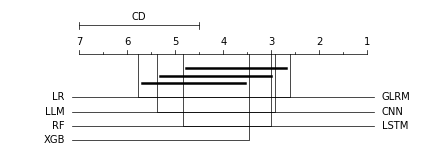

In [3]:
data_names = ['bpic2011_f1','bpic2011_f2','bpic2011_f3','bpic2011_f4',
              'bpic2015_1_f2','bpic2015_2_f2','bpic2015_3_f2','bpic2015_4_f2','bpic2015_5_f2',
              'sepsis_cases_1','sepsis_cases_2','sepsis_cases_4','production']
classifiers = ['LR', 'LLM', 'GLRM','XGB','RF','LSTM','CNN']
table = pd.pivot_table(df, values='AUC', aggfunc=np.max, index= ['dataset_name'],
                    columns=['classifier'])
result2 = pd.DataFrame(table, index=data_names, columns=classifiers)

#https://github.com/sherbold/autorank/tree/e47386e9e4fdd7e1d9284201842fc0ef4548006d

res = autorank(result2)
create_report(res)
plot_stats(res)
plt.show()
#latex_table(res)

In [4]:
table = pd.pivot_table(df, values='AUC', aggfunc=np.max, index=['dataset_name'],
                    columns=['classifier'])
result2 = pd.DataFrame(table, index=data_names, columns=classifiers)

In [5]:
result2

,LR,LLM,GLRM,XGB,RF,LSTM,CNN
bpic2011_f1,95.88,97.34,91.98,95.59,93.09,75.50,79.69
bpic2011_f2,96.56,98.18,97.40,98.21,98.49,86.55,80.67
bpic2011_f3,98.71,98.55,98.01,98.90,98.87,78.78,85.01
bpic2011_f4,88.21,89.75,80.63,86.46,89.04,87.22,85.83
bpic2015_1_f2,93.42,93.67,89.21,87.96,92.16,90.29,90.66
bpic2015_2_f2,94.74,94.99,87.18,95.65,93.89,94.34,92.55
bpic2015_3_f2,96.13,95.92,93.75,93.71,96.00,94.56,93.72
bpic2015_4_f2,94.79,94.28,91.33,92.39,93.93,90.70,85.99
bpic2015_5_f2,93.54,93.55,90.49,93.78,94.86,91.99,93.50
sepsis_cases_1,54.03,45.67,47.18,39.38,32.14,56.27,50.45


In [6]:
result2.to_csv('AUCresults.csv')

In [7]:
idx = df.groupby(['dataset_name'])['AUC'].transform(max) == df['AUC']
df_overview = df[idx]

df_overview

,dataset_name,cls_encoding,classifier,AUC,#event columns,#case columns,#control columns,pars. event,pars. case,pars. control,perc_pars_event,perc_pars_case,perc_pars_control,perc_event_total,perc_case_total,perc_control_total,FC event,FC_case,FC control,monotonicity,LOD
1,bpic2011_f1,agg,LLM,97.34,136,730,175,6.0,13.5,9.0,4.41,1.85,5.14,21.05,47.37,31.58,0.00,0.00,100.00,NaN,5.66
11,bpic2011_f2,agg,RF,98.49,146,760,215,134.0,760.0,207.0,91.78,100.00,96.28,12.17,69.03,18.80,27.78,28.12,24.53,0.11,9.90
17,bpic2011_f3,agg,XGB,98.90,132,670,166,67.0,36.0,49.0,50.76,5.37,29.52,44.08,23.68,32.24,28.37,9.53,33.18,0.47,1.41
22,bpic2011_f4,agg,LLM,89.75,143,759,204,111.5,394.0,160.5,77.62,51.91,78.68,16.74,59.16,24.10,14.42,96.00,0.00,0.27,12.02
29,bpic2015_1_f2,agg,LLM,93.67,88,35,266,49.5,24.5,149.5,55.68,70.00,56.20,22.15,10.96,66.89,0.80,4.37,98.75,0.37,3.74
38,bpic2015_2_f2,agg,XGB,95.65,68,23,300,60.0,20.0,80.0,88.24,86.96,26.67,37.50,12.50,50.00,26.84,26.03,92.97,0.41,0.00
42,bpic2015_3_f2,agg,LR,96.13,87,34,314,25.0,22.0,54.0,28.74,64.71,17.20,24.75,21.78,53.47,0.00,0.00,0.00,0.11,3.74
49,bpic2015_4_f2,agg,LR,94.79,67,23,261,65.0,23.0,246.0,97.01,100.00,94.25,19.46,6.89,73.65,25.92,7.30,0.03,0.14,9.90
60,bpic2015_5_f2,agg,RF,94.86,78,25,246,76.0,24.0,219.0,97.44,96.00,89.02,23.82,7.52,68.65,20.53,24.76,86.01,0.34,8.49
68,sepsis_cases_1,embeddings,LSTM,56.27,12,24,1,12.0,24.0,1.0,100.00,100.00,100.00,32.43,64.86,2.70,0.01,0.01,0.02,0.51,1.41


### comparison of (ML) to (DL)

In [8]:
#aggregation encoding
agg = df[df.cls_encoding=='agg']
print("aggregation encoding mean", np.mean(agg['AUC']))

#index encoding
embedding = df[df.cls_encoding=='embeddings']
print('embedding encoding mean',np.mean(embedding['AUC']))

aggregation encoding mean 85.21784615384617
embedding encoding mean 81.23961538461539


In [9]:
#aggregation encoding
agg = df[df.cls_encoding=='agg']
agg = agg[agg.classifier.isin(['XGB','RF'])]
print("aggregation encoding mean", np.mean(agg['AUC']))

#index encoding
embedding = df[df.cls_encoding=='embeddings']
print('embedding encoding mean',np.mean(embedding['AUC']))


# Shapiro-Wilk test for normality
print(shapiro(agg['AUC']))
shapiro(embedding['AUC'])

# We should looka at the Wilcoxon sign ranked test (https://www.jmlr.org/papers/volume7/demsar06a/demsar06a.pdf) as the normality test reject the null hypothesis
wilcoxon(agg['AUC'], embedding['AUC'])

aggregation encoding mean 85.68346153846154
embedding encoding mean 81.23961538461539
ShapiroResult(statistic=0.7080938816070557, pvalue=6.855967058072565e-06)


WilcoxonResult(statistic=61.0, pvalue=0.0036366878938305404)

**confirmatory analysis, similar insights compared to Kratsch**

- Deep learning models tend to work best for event logs with high amount of event classes, therefore also for event logs with high variant to instance ratio
- Contrarily, we do not see that LSTM outperforms DNN (here: CNN) for logs featuring a high activity-to-instance payload ratio due to the fact that both models made use of a similar embedding mechanism. Nonetheless, it is clear that the LSTM outperform the CNN based on the number of static categorical levels, therefore holding similar insights compared to propositon P3.

In [10]:
#best performance per dataset
idx = df.groupby(['dataset_name'])['AUC'].transform(max) == df['AUC']
df_overview = df[idx]

df_overview

,dataset_name,cls_encoding,classifier,AUC,#event columns,#case columns,#control columns,pars. event,pars. case,pars. control,perc_pars_event,perc_pars_case,perc_pars_control,perc_event_total,perc_case_total,perc_control_total,FC event,FC_case,FC control,monotonicity,LOD
1,bpic2011_f1,agg,LLM,97.34,136,730,175,6.0,13.5,9.0,4.41,1.85,5.14,21.05,47.37,31.58,0.00,0.00,100.00,NaN,5.66
11,bpic2011_f2,agg,RF,98.49,146,760,215,134.0,760.0,207.0,91.78,100.00,96.28,12.17,69.03,18.80,27.78,28.12,24.53,0.11,9.90
17,bpic2011_f3,agg,XGB,98.90,132,670,166,67.0,36.0,49.0,50.76,5.37,29.52,44.08,23.68,32.24,28.37,9.53,33.18,0.47,1.41
22,bpic2011_f4,agg,LLM,89.75,143,759,204,111.5,394.0,160.5,77.62,51.91,78.68,16.74,59.16,24.10,14.42,96.00,0.00,0.27,12.02
29,bpic2015_1_f2,agg,LLM,93.67,88,35,266,49.5,24.5,149.5,55.68,70.00,56.20,22.15,10.96,66.89,0.80,4.37,98.75,0.37,3.74
38,bpic2015_2_f2,agg,XGB,95.65,68,23,300,60.0,20.0,80.0,88.24,86.96,26.67,37.50,12.50,50.00,26.84,26.03,92.97,0.41,0.00
42,bpic2015_3_f2,agg,LR,96.13,87,34,314,25.0,22.0,54.0,28.74,64.71,17.20,24.75,21.78,53.47,0.00,0.00,0.00,0.11,3.74
49,bpic2015_4_f2,agg,LR,94.79,67,23,261,65.0,23.0,246.0,97.01,100.00,94.25,19.46,6.89,73.65,25.92,7.30,0.03,0.14,9.90
60,bpic2015_5_f2,agg,RF,94.86,78,25,246,76.0,24.0,219.0,97.44,96.00,89.02,23.82,7.52,68.65,20.53,24.76,86.01,0.34,8.49
68,sepsis_cases_1,embeddings,LSTM,56.27,12,24,1,12.0,24.0,1.0,100.00,100.00,100.00,32.43,64.86,2.70,0.01,0.01,0.02,0.51,1.41


## Parsimony vs FC

In [11]:
def create_plot(ax1, ylabel):

    ax1.set_xticks([0,1,2,3,4,5,6])
    ax1.set_xticklabels(['CNN', 'GLRM', 'LLM', 'LR', 'LSTM', 'RF', 'XGB'], size=15)
    ax1.set_yticks([0,50,100])
    ax1.set_yticklabels([0,50,100], size=15)
   
    # grid lines
    ax1.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    ax1.set_ylabel(ylabel, fontsize=10)
    return ax1

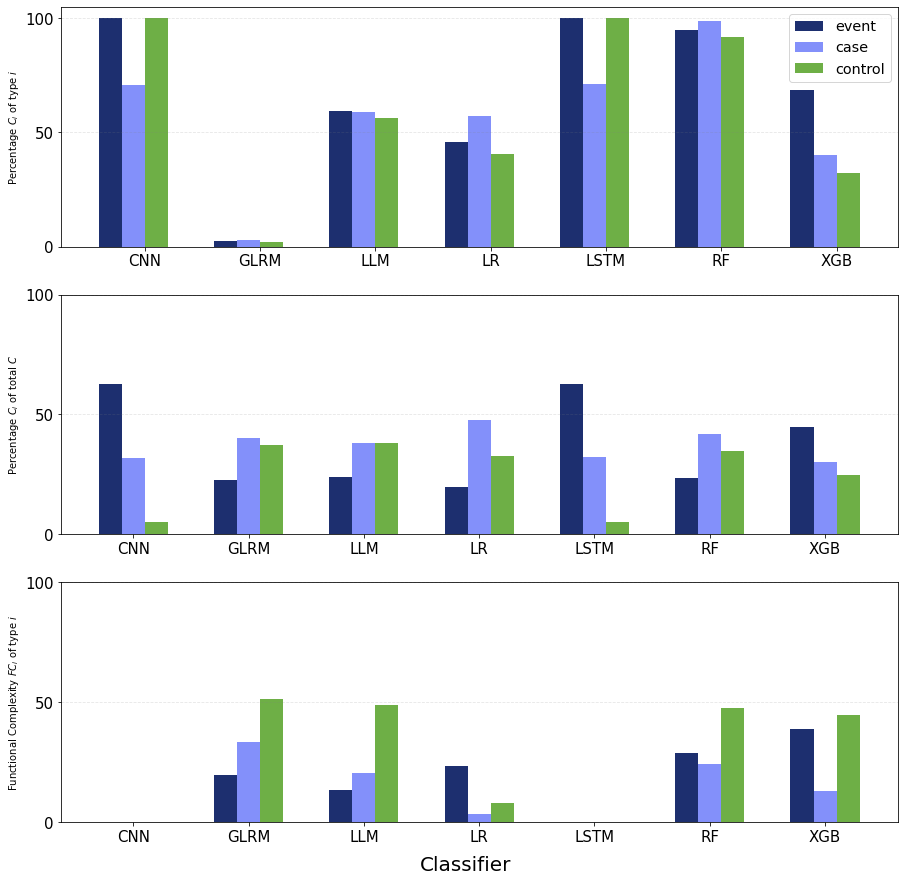

In [12]:
#define grid of plots

#AXIS1
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(15,15))


#fig1
data_classifier_auc = df.groupby(['dataset_name','classifier'])[['perc_pars_event','perc_pars_case','perc_pars_control']].mean()

d = {'pars event': list(data_classifier_auc.groupby('classifier')['perc_pars_event'].mean()[0:7]), 'pars case': list(data_classifier_auc.groupby('classifier')['perc_pars_case'].mean()[0:7]), 'pars control': list(data_classifier_auc.groupby('classifier')['perc_pars_control'].mean()[0:7])}
df_grouped = pd.DataFrame(data=d,  index=['CNN', 'GLRM','LLM','LR','LSTM','RF','XGB'])

ax1 = create_plot(ax1,'Percentage $C_{i}$ of type $i$')

# numerical x
x = np.arange(0, len(df_grouped.index))
ax1.bar(x - 0.3, df_grouped['pars event'], width = 0.2, color = '#1D2F6F')
ax1.bar(x - 0.1, df_grouped['pars case'], width = 0.2, color = '#8390FA')
ax1.bar(x + 0.1, df_grouped['pars control'], width = 0.2, color = '#6EAF46')

ax1.legend(['event','case', 'control'], loc='upper right', ncol = 1, fontsize='x-large')

#AXIS 2
data_classifier_auc = df.groupby(['dataset_name','classifier'])[['perc_event_total','perc_case_total','perc_control_total']].mean()
d = {'event/total': list(data_classifier_auc.groupby('classifier')['perc_event_total'].mean()[0:7]), 'case/total': list(data_classifier_auc.groupby('classifier')['perc_case_total'].mean()[0:7]), 'control/total': list(data_classifier_auc.groupby('classifier')['perc_control_total'].mean()[0:7])}
df_grouped = pd.DataFrame(data=d,  index=['CNN', 'GLRM','LLM','LR','LSTM','RF','XGB'])

ax2.bar(x - 0.2, df_grouped['event/total'], width = 0.2, color = '#1D2F6F')
ax2.bar(x - 0.0, df_grouped['case/total'], width = 0.2, color = '#8390FA')
ax2.bar(x + 0.2, df_grouped['control/total'], width = 0.2, color = '#6EAF46')

ax2 = create_plot(ax2,'Percentage $C_{i}$ of total $C$')


data_classifier_auc = df.groupby(['dataset_name','classifier'])[['FC event','FC_case','FC control']].mean()

d = {'event': list(data_classifier_auc.groupby('classifier')['FC event'].mean()[0:7]), 'case': list(data_classifier_auc.groupby('classifier')['FC_case'].mean()[0:7]), 'control': list(data_classifier_auc.groupby('classifier')['FC control'].mean()[0:7])}
df_grouped = pd.DataFrame(data=d,  index=['CNN', 'GLRM','LLM','LR','LSTM','RF','XGB'])

ax3.bar(x - 0.2, df_grouped['event'], width = 0.2, color = '#1D2F6F')
ax3.bar(x - 0.0, df_grouped['case'], width = 0.2, color = '#8390FA')
ax3.bar(x + 0.2, df_grouped['control'], width = 0.2, color = '#6EAF46')

ax3 = create_plot(ax3,'Functional Complexity $FC_{i}$ of type $i$')
fig.text(0.5, 0.08, 'Classifier', ha='center', fontsize=20)
fig.savefig("classifierplot.pdf", transparent=True)

In [13]:
def create_plot(ax, ylabel):
    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_xticklabels(['CNN', 'GLRM', 'LLM', 'LR', 'LSTM', 'RF', 'XGB'], size=15)
    max_val = round(df_grouped.max(axis=0).max(),0).astype('int')
    if max_val<=100:
        ax.set_yticks([0,50,100])
        ax.set_yticklabels([0,50,100], size=15)
    else:
        ax.set_yticks([0,150,300])
        ax.set_yticklabels([0,150,300], size=15)
    # grid lines
    ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    ax.set_ylabel(ylabel, fontsize=20, rotation='vertical', horizontalalignment='center')
    return ax

In [21]:
def create_plot_faithfulness(ax, ylabel):
    ax.set_xticks([0,1,2,3,4,5,6])
    ax.set_xticklabels(['CNN', 'GLRM', 'LLM', 'LR', 'LSTM', 'RF', 'XGB'], size=15)
    if df_grouped.max()[0]>=1:
        ax.set_yticks([0,3.5,7])
        ax.set_yticklabels([0,3.5,7], size=15)
    else:
        ax.set_yticks([0,0.5,1])
        ax.set_yticklabels([0,0.5,1], size=15)
    # grid lines
    ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
    ax.set_ylabel(ylabel, fontsize=20, rotation='vertical',  horizontalalignment='center')

    return ax

In [22]:
# function to add value labels
def addlabels_LOD(ax, x,y):
    for i in range(len(x)):
        ax.text(i,y[i],y[i], fontsize=15, position=(x[i]+0.1,y[i]+0.1))
def addlabels_monotonicity(ax, x,y):
    for i in range(len(x)):
        ax.text(i,y[i],y[i], fontsize=15, position=(x[i]+0.10,y[i]+0.01))

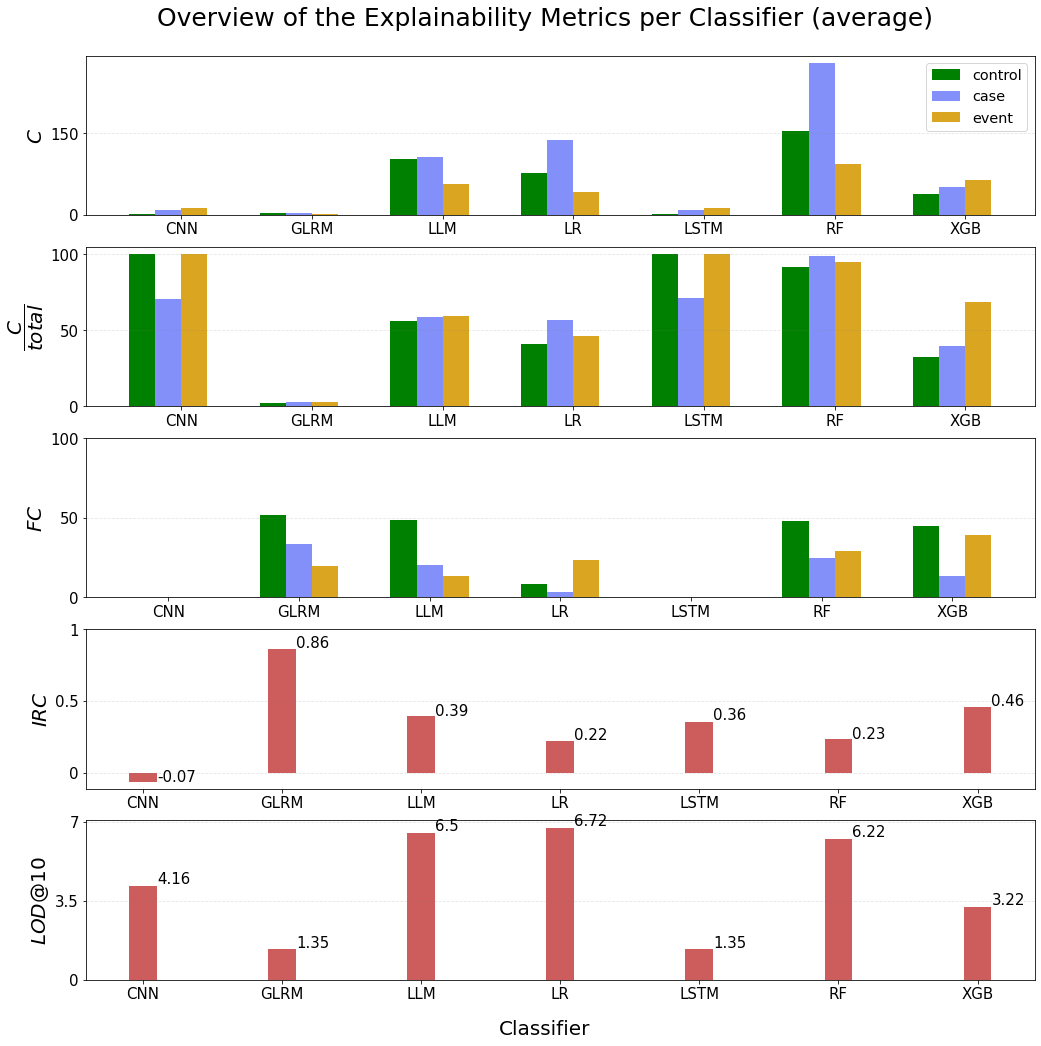

In [25]:
#define grid of plots
#AXIS1
fig, (ax1,ax1b,ax2,ax3,ax4) = plt.subplots(5, figsize=(17,17))
fig.suptitle('Overview of the Explainability Metrics per Classifier (average)',x=0.5,y=0.92, fontsize=25)

#fig1
data_classifier_auc = df.groupby(['dataset_name','classifier'])[['pars. control','pars. case','pars. event']].mean()

d = {'pars control': list(data_classifier_auc.groupby('classifier')['pars. control'].mean()[0:7])
     , 'pars case': list(data_classifier_auc.groupby('classifier')['pars. case'].mean()[0:7])
     , 'pars event': list(data_classifier_auc.groupby('classifier')['pars. event'].mean()[0:7])}
df_grouped = pd.DataFrame(data=d,  index=['CNN', 'GLRM','LLM','LR','LSTM','RF','XGB'])

ax1 = create_plot(ax1,'$C$')
# numerical x
x = np.arange(0, len(df_grouped.index))
ax1.bar(x - 0.3, df_grouped['pars control'], width = 0.2, color = 'green')
ax1.bar(x - 0.1, df_grouped['pars case'], width = 0.2, color = '#8390FA')
ax1.bar(x + 0.1, df_grouped['pars event'], width = 0.2, color = 'goldenrod')

ax1.legend(['control','case', 'event'], loc='upper right', ncol = 1, fontsize='x-large')

#fig1
data_classifier_auc = df.groupby(['dataset_name','classifier'])[['perc_pars_control','perc_pars_case','perc_pars_event']].mean()

d = {'perc_pars_control': list(data_classifier_auc.groupby('classifier')['perc_pars_control'].mean()[0:7]), 
     'perc_pars_case': list(data_classifier_auc.groupby('classifier')['perc_pars_case'].mean()[0:7]), 
     'perc_pars_event': list(data_classifier_auc.groupby('classifier')['perc_pars_event'].mean()[0:7])}
df_grouped = pd.DataFrame(data=d,  index=['CNN', 'GLRM','LLM','LR','LSTM','RF','XGB'])

ax1b = create_plot(ax1b,r'$\dfrac{C}{total}$')
# numerical x
x = np.arange(0, len(df_grouped.index))
ax1b.bar(x - 0.3, df_grouped['perc_pars_control'], width = 0.2, color = 'green')
ax1b.bar(x - 0.1, df_grouped['perc_pars_case'], width = 0.2, color = '#8390FA')
ax1b.bar(x + 0.1, df_grouped['perc_pars_event'], width = 0.2, color = 'goldenrod')


#AXIS 2
data_classifier_auc = df.groupby(['dataset_name','classifier'])[['FC control','FC_case','FC event']].mean()

d = {'control': list(data_classifier_auc.groupby('classifier')['FC control'].mean()[0:7])
     ,'case': list(data_classifier_auc.groupby('classifier')['FC_case'].mean()[0:7])
     ,'event': list(data_classifier_auc.groupby('classifier')['FC event'].mean()[0:7])}
df_grouped = pd.DataFrame(data=d,  index=['CNN', 'GLRM','LLM','LR','LSTM','RF','XGB'])

ax2.bar(x - 0.2, df_grouped['control'], width = 0.2, color = 'green')
ax2.bar(x - 0.0, df_grouped['case'], width = 0.2, color = '#8390FA')
ax2.bar(x + 0.2, df_grouped['event'], width = 0.2, color = 'goldenrod')

ax2 = create_plot(ax2,'$FC$')

#AXIS 3
data_classifier_auc = df.groupby(['dataset_name','classifier'])[['monotonicity']].mean()

d = {'monotonicity': list(data_classifier_auc.groupby('classifier')['monotonicity'].mean()[0:7])}
df_grouped = pd.DataFrame(data=d,  index=['CNN', 'GLRM','LLM','LR','LSTM','RF','XGB'])

ax3.bar(x, df_grouped['monotonicity'], width = 0.2, color = 'indianred')
addlabels_monotonicity(ax3, x, round(df_grouped['monotonicity'],2))
ax3 = create_plot_faithfulness(ax3,'$IRC$')


#AXIS 4
data_classifier_auc = df.groupby(['dataset_name','classifier'])[['LOD']].mean()

d = {'LOD': list(data_classifier_auc.groupby('classifier')['LOD'].mean()[0:7])}
df_grouped = pd.DataFrame(data=d,  index=['CNN', 'GLRM','LLM','LR','LSTM','RF','XGB'])
rects1 = ax4.bar(x, df_grouped['LOD'], width = 0.2, color = 'indianred')
ax4 = create_plot_faithfulness(ax4,'$LOD@10$')
addlabels_LOD(ax4, x, round(df_grouped['LOD'],2))
fig.tight_layout

fig.text(0.5, 0.08, 'Classifier', ha='center', fontsize=20)

fig.savefig("Figures/classifierplot.pdf", transparent=True)

In [18]:
data_names = ['bpic2011_f1','bpic2011_f2','bpic2011_f3','bpic2011_f4',
              'bpic2015_1_f2','bpic2015_2_f2','bpic2015_3_f2','bpic2015_4_f2','bpic2015_5_f2',
              'sepsis_cases_1','sepsis_cases_2','sepsis_cases_4','production']
classifiers = ['LR', 'LLM', 'GLRM','XGB','RF','LSTM','CNN']

In [20]:
for i in classifiers:
    print(i,df2[df2.classifier==i]['AUC'].mean())

LR 94.432
LLM 94.57000000000001
GLRM 89.30199999999999
XGB 93.01000000000002
RF 93.337
LSTM 87.46200000000002
CNN 86.975


In [21]:
print(classifiers)

['LR', 'LLM', 'GLRM', 'XGB', 'RF', 'LSTM', 'CNN']


## decision tree

In [104]:
import pandas as pd
import math

In [105]:
eventlogspecs = pd.read_csv('data_information.csv', index_col=0)

In [106]:
eventlogspecs

,dataset_name,events,cases,max prefix length,#event columns,#case columns,#control columns,activities,avg. act per case,static cols,dynamic cols
0,bpic2011_f1,67480,1140,36,13,6,1,67480,19.0,6,14
1,bpic2011_f2,149730,1140,40,13,6,1,149730,29.0,6,14
2,bpic2011_f3,70546,1121,31,13,6,1,70546,19.0,6,14
3,bpic2011_f4,93065,1140,40,13,6,1,93065,25.0,6,14
4,bpic2015_1_f2,28775,696,40,11,17,1,28775,37.0,17,12
5,bpic2015_2_f2,41202,753,40,11,17,1,41202,50.0,17,12
6,bpic2015_3_f2,57488,1328,40,11,18,1,57488,40.0,18,12
7,bpic2015_4_f2,24234,577,40,11,15,1,24234,40.0,15,12
8,bpic2015_5_f2,54562,1051,40,11,18,1,54562,48.0,18,12
9,sepsis_cases_1,13120,782,29,12,24,1,13120,10.0,24,13


In [107]:
idx = df.groupby(['dataset_name'])['AUC'].transform(max) == df['AUC']
df_overview = df[idx]
df_overview

,dataset_name,cls_encoding,classifier,AUC,#event columns,#case columns,#control columns,pars. event,pars. case,pars. control,perc_pars_event,perc_pars_case,perc_pars_control,perc_event_total,perc_case_total,perc_control_total,FC event,FC_case,FC control,monotonicity,LOD
1,bpic2011_f1,agg,LLM,97.34,136,730,175,6.0,13.5,9.0,4.41,1.85,5.14,21.05,47.37,31.58,0.00,0.00,100.00,NaN,5.66
11,bpic2011_f2,agg,RF,98.49,146,760,215,134.0,760.0,207.0,91.78,100.00,96.28,12.17,69.03,18.80,27.78,28.12,24.53,0.11,9.90
17,bpic2011_f3,agg,XGB,98.90,132,670,166,67.0,36.0,49.0,50.76,5.37,29.52,44.08,23.68,32.24,28.37,9.53,33.18,0.47,1.41
22,bpic2011_f4,agg,LLM,89.75,143,759,204,111.5,394.0,160.5,77.62,51.91,78.68,16.74,59.16,24.10,14.42,96.00,0.00,0.27,12.02
29,bpic2015_1_f2,agg,LLM,93.67,88,35,266,49.5,24.5,149.5,55.68,70.00,56.20,22.15,10.96,66.89,0.80,4.37,98.75,0.37,3.74
38,bpic2015_2_f2,agg,XGB,95.65,68,23,300,60.0,20.0,80.0,88.24,86.96,26.67,37.50,12.50,50.00,26.84,26.03,92.97,0.41,0.00
42,bpic2015_3_f2,agg,LR,96.13,87,34,314,25.0,22.0,54.0,28.74,64.71,17.20,24.75,21.78,53.47,0.00,0.00,0.00,0.11,3.74
49,bpic2015_4_f2,agg,LR,94.79,67,23,261,65.0,23.0,246.0,97.01,100.00,94.25,19.46,6.89,73.65,25.92,7.30,0.03,0.14,9.90
60,bpic2015_5_f2,agg,RF,94.86,78,25,246,76.0,24.0,219.0,97.44,96.00,89.02,23.82,7.52,68.65,20.53,24.76,86.01,0.34,8.49
68,sepsis_cases_1,embeddings,LSTM,56.27,12,24,1,12.0,24.0,1.0,100.00,100.00,100.00,32.43,64.86,2.70,0.01,0.01,0.02,0.51,1.41


In [124]:
df2 = df_overview.copy()
MLDLclassifiers = ['XGB','RF','LSTM','CNN']
underperforming = list(df2.groupby('dataset_name')['AUC'].mean()[df2.groupby('dataset_name')['AUC'].mean()<50].index)
underperforming
# Filter out the low performing datasets (AUC<0.5)
#only the sepsis_cases_1 should be filtered out, as it only concerns the GLRM model for dataset BPIC2015_1
df2 = df2[~df2.dataset_name.isin(underperforming)]
list(set(df2.groupby('dataset_name')['AUC'].max()[df2.groupby('dataset_name')['AUC'].max()<0.75].index))
#not representative for XAI purpose
df2 = df2[~df2.dataset_name.isin(list(set(df2.groupby('dataset_name')['AUC'].max()[df2.groupby('dataset_name')['AUC'].max()<80].index)))]

In [125]:
df3 = df2.merge(eventlogspecs, on='dataset_name', how='inner')

In [130]:
df3.monotonicity = df3.monotonicity.astype('float')
for i in range(0,len(df3)):
    if math.isnan(df3.monotonicity[i])==True:
        df3.monotonicity[i] = 0

In [138]:
df3['monotonicity_bin'] = pd.cut(x=df3['monotonicity'], bins=[-0.1, 0.3,0.7,1],
                     labels=['low','average','high'])

In [140]:
df3['monotonicity_bin']

0        low
1        low
2    average
3        low
4    average
5    average
6        low
7        low
8    average
9        low
Name: monotonicity_bin, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

In [142]:
df3['monotonicity_bin']

0        low
1        low
2    average
3        low
4    average
5    average
6        low
7        low
8    average
9        low
Name: monotonicity_bin, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

1.0


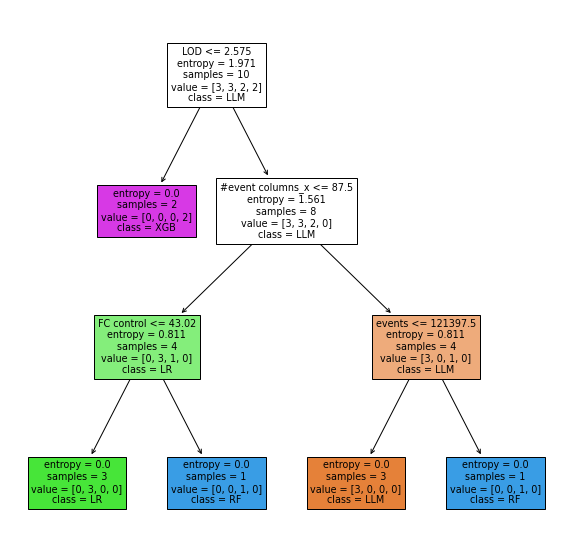

In [144]:
y  = df3['classifier']
result = df3.drop('monotonicity', axis=1)
result = result.drop('monotonicity_bin', axis=1)
result = result.drop('dataset_name', axis=1)
result = result.drop('classifier', axis=1)
result = result.drop('AUC', axis=1)
result = result.drop('cls_encoding', axis=1)
column_names= result.columns.tolist()

#developing a model
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=1)

clf_pruned.fit(result, y)
class_names = clf_pruned.classes_.tolist()
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf_pruned, 
                   feature_names=column_names,  
                   class_names= class_names,
                   filled=True)
pred = clf_pruned.predict(result)
print(accuracy_score(y,pred))

In [70]:
class_names

['0', '1', '2', '3', '4', '5', '6']

In [ ]:
df['AUC']

## IRC

In [34]:
len(df2)

70

In [35]:
data_names = ['bpic2011_f1','bpic2011_f2','bpic2011_f3','bpic2011_f4',
              'bpic2015_1_f2','bpic2015_2_f2','bpic2015_3_f2','bpic2015_4_f2','bpic2015_5_f2',
              'sepsis_cases_2']
classifiers = ['LR', 'LLM', 'GLRM','XGB','RF','LSTM','CNN']

In [36]:
len(data_names)*len(classifiers)

70

In [109]:
ensemble = df[df.classifier.isin(['XGB','RF'])]
DL = df[df.classifier.isin(['LSTM','CNN'])]
LSTM = df[df.classifier.isin(['LSTM'])]
CNN = df[df.classifier.isin(['CNN'])]

In [110]:
len(ensemble)

26

In [111]:
np.count_nonzero(np.array(ensemble.monotonicity)>np.array(DL.monotonicity))

19

In [112]:
np.count_nonzero(np.array(ensemble.LOD)>np.array(DL.LOD))

20

In [114]:
np.count_nonzero(np.array(LSTM.monotonicity)>np.array(CNN.monotonicity))

11

In [116]:
np.count_nonzero(np.array(LSTM.LOD)<np.array(CNN.LOD))

9